In [2]:
#import the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sb
import plotly as py
import plotly.express as px
import sketch
import numpy as np
import pandas as pd
from io import StringIO
import requests

import warnings

In [39]:
# Loading dataset
df = pd.read_csv("loan.csv")
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_16520\3261746476.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,54734,80364,25000,25000,19080.057200,36 months,11.89%,829.10,B,B4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,55742,114426,7000,7000,672.803839,36 months,10.71%,228.22,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,57245,138150,1200,1200,1200.000000,36 months,13.11%,40.50,C,C2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,57416,139635,10800,10800,10691.551050,36 months,13.57%,366.86,C,C3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,58915,153417,7500,5025,557.087228,36 months,10.08%,162.34,B,B3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [40]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [41]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [42]:
df.id.count()

np.int64(39717)

In [43]:
nullV= df.isnull().sum()

In [44]:
nullV.sort_values(ascending=False).head(20)

num_il_tl                         39717
num_bc_sats                       39717
num_bc_tl                         39717
num_actv_bc_tl                    39717
num_accts_ever_120_pd             39717
mths_since_recent_revol_delinq    39717
num_actv_rev_tl                   39717
mths_since_recent_inq             39717
num_tl_90g_dpd_24m                39717
num_tl_30dpd                      39717
num_tl_120dpd_2m                  39717
num_sats                          39717
num_rev_tl_bal_gt_0               39717
num_rev_accts                     39717
pct_tl_nvr_dlq                    39717
mo_sin_old_il_acct                39717
mo_sin_old_rev_tl_op              39717
mo_sin_rcnt_rev_tl_op             39717
mo_sin_rcnt_tl                    39717
mths_since_recent_bc              39717
dtype: int64

In [45]:
nullCol = np.array(nullV.loc[lambda x : x == 39717].index)

In [46]:
# Removed all Null Columns
df = df.drop(columns=nullCol)

In [47]:
df.isnull().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12942
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
verification_status               0
annual_inc                        0
term                              0
grade                             0
installment                       0
int_rate                          0
funded_amnt_inv                   0
member_id                         0
loan_amnt                         0
funded_amnt                       0
id                                0
dti                               0
addr_state                        0
zip_code                    

In [48]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,54734,80364,25000,25000,19080.057200,36 months,11.89%,829.10,B,B4,...,NaN,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,55742,114426,7000,7000,672.803839,36 months,10.71%,228.22,B,B5,...,NaN,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,57245,138150,1200,1200,1200.000000,36 months,13.11%,40.50,C,C2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,57416,139635,10800,10800,10691.551050,36 months,13.57%,366.86,C,C3,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,58915,153417,7500,5025,557.087228,36 months,10.08%,162.34,B,B3,...,NaN,Mar-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [49]:
#df1 = df.to_csv("loan2.csv")

pymnt_plan	url	desc
title	zip_code	addr_state	dti	delinq_2yrs	earliest_cr_line	inq_last_6mths	mths_since_last_delinq	mths_since_last_record	open_acc	pub_rec	revol_bal	revol_util	total_acc	initial_list_status	out_prncp	out_prncp_inv	total_pymnt	total_pymnt_inv	total_rec_prncp	total_rec_int	total_rec_late_fee	recoveries	collection_recovery_fee	last_pymnt_d	last_pymnt_amnt	next_pymnt_d	last_credit_pull_d	collections_12_mths_ex_med	policy_code	application_type	acc_now_delinq	chargeoff_within_12_mths	delinq_amnt


In [50]:
nullCol2 = np.array(['pymnt_plan', 'url', 'desc', 'title', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt'])


In [51]:
df = df.drop(columns=nullCol2)

In [52]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,54734,80364,25000,25000,19080.057200,36 months,11.89%,829.10,B,B4,...,0.0,0.0,Oct-11,7392.08,NaN,Aug-12,0.0,0.0,0.0,0.0
1,55742,114426,7000,7000,672.803839,36 months,10.71%,228.22,B,B5,...,0.0,0.0,Jun-11,228.48,NaN,Aug-12,0.0,0.0,0.0,0.0
2,57245,138150,1200,1200,1200.000000,36 months,13.11%,40.50,C,C2,...,0.0,0.0,Mar-13,42.73,NaN,May-16,0.0,0.0,0.0,0.0
3,57416,139635,10800,10800,10691.551050,36 months,13.57%,366.86,C,C3,...,0.0,0.0,Nov-12,398.00,NaN,May-16,0.0,0.0,0.0,0.0
4,58915,153417,7500,5025,557.087228,36 months,10.08%,162.34,B,B3,...,0.0,0.0,Apr-11,162.63,NaN,Mar-14,0.0,0.0,0.0,0.0


In [53]:
df.shape

(39717, 48)

In [55]:
df1 = df.to_csv("loan4.csv")

In [56]:
df.isnull().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
revol_util                       50
tax_liens                        39
last_credit_pull_d                2
funded_amnt_inv                   0
term                              0
id                                0
member_id                         0
issue_d                           0
verification_status               0
annual_inc                        0
home_ownership                    0
grade                             0
sub_grade                         0
int_rate                          0
installment                       0
funded_amnt                       0
loan_amnt                         0
inq_last_6mths                    0
loan_status                 

In [59]:
df2 = pd.read_csv("loan4.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_16520\2028598937.py:1: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("loan4.csv")


(array([ 972.,  894.,  949., 1044., 1281., 1358., 1463., 1648., 1767.,
        1826., 1944., 1880., 2011., 2024., 2034., 1967., 1890., 1761.,
        1760., 1730., 1612., 1445., 1434., 1228., 1117.,  158.,  174.,
         141.,  107.,   98.]),
 array([ 0.        ,  0.99966667,  1.99933333,  2.999     ,  3.99866667,
         4.99833333,  5.998     ,  6.99766667,  7.99733333,  8.997     ,
         9.99666667, 10.99633333, 11.996     , 12.99566667, 13.99533333,
        14.995     , 15.99466667, 16.99433333, 17.994     , 18.99366667,
        19.99333333, 20.993     , 21.99266667, 22.99233333, 23.992     ,
        24.99166667, 25.99133333, 26.991     , 27.99066667, 28.99033333,
        29.99      ]),
 <BarContainer object of 30 artists>)

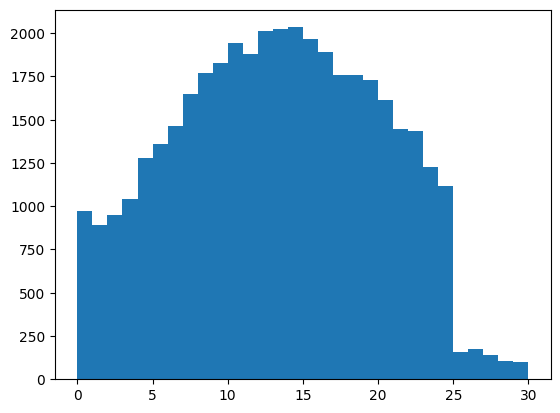

In [62]:
plt.hist(df2.dti, bins=30)

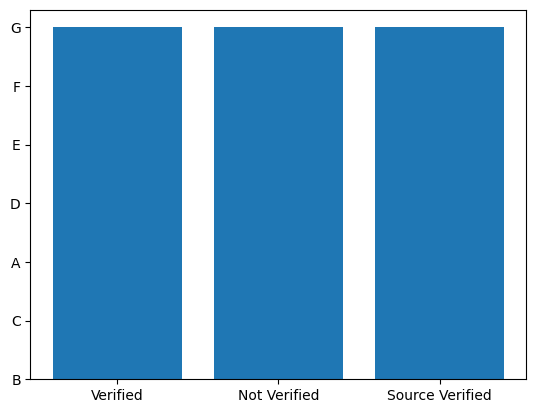

In [65]:
plt.bar(df2.verification_status, df2.grade)
plt.show()

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

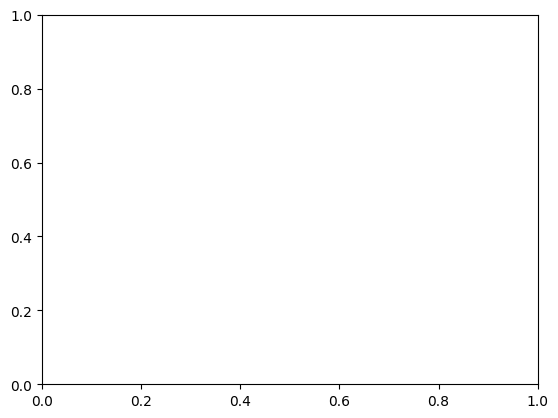

In [67]:
#
# plt.scatter(df2.verification_status, df2.grade)

plt.boxplot([df2.verification_status, df2.grade, df2.dti])
